# Dev Notebook

In [4]:
import pyGCxGC as gcgc
import pandas as pd
from matplotlib import pyplot as plt
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)


In [5]:
Chromatogram = gcgc.parse_2D_chromatogram('example_data/example_chromatograms/Example_FID.csv', modulation_time = 20,
                                          sampling_interval= 'infer', shift=0,
                                            normalize='volume', solvent_cutoff=0)

FileNotFoundError: [Errno 2] No such file or directory: 'example_data/example_chromatograms/Example_FID.csv'

## Parsing and Plotting

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10/1.615))
plt.imshow(np.sqrt(np.sqrt(Chromatogram.chrom_2D)), cmap='viridis', extent=Chromatogram.limits, interpolation='bilinear', aspect='auto')
plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
plt.xlim(0,106)
# plt.savefig('test.png', dpi=1000, bbox_inches='tight')


NameError: name 'plt' is not defined

## Masking

(0.0, 106.0)

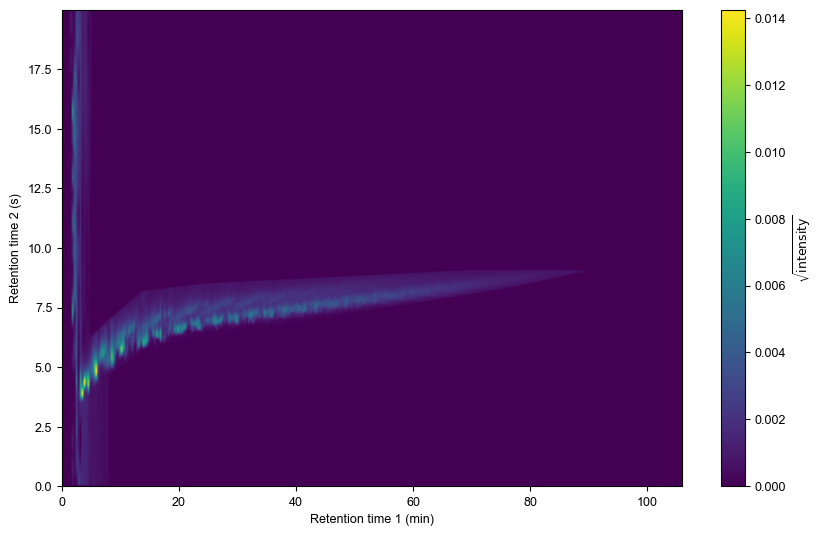

In [ ]:
masked_chromatogram = gcgc.mask_chromatogram(Chromatogram.chrom_2D, 'example_data/example_masks/Mask_1.tif')

plt.figure(figsize=(10,10/1.615))
plt.imshow(np.sqrt(masked_chromatogram), cmap='viridis', extent=Chromatogram.limits, interpolation='bilinear', aspect='auto') # type: ignore
plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
plt.xlim(0,106)
# plt.savefig('test.png', dpi=1000, bbox_inches='tight')

# Masking & Integrating

,Mask_1,Mask_2
Sample 1,0.792885,0.137872


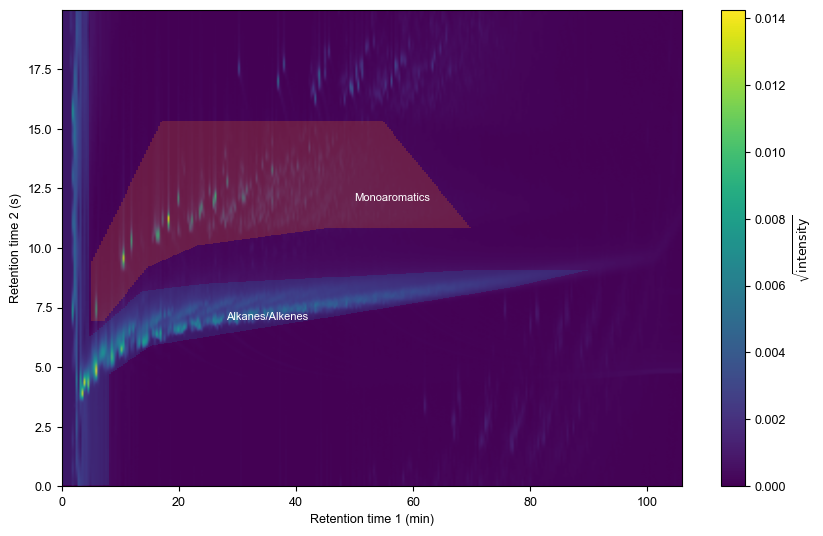

In [ ]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import tifffile

import os

mask_list = os.listdir('example_data/example_masks/')

plt.figure(figsize=(10,10/1.615))
plt.imshow(np.sqrt(Chromatogram.chrom_2D), cmap='viridis', extent=Chromatogram.limits, interpolation='bilinear', aspect='auto')
plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')



colormaplist = [ListedColormap(['none', 'C'+str(i)]) for i in range(6) ]
annotations = [['Alkanes/Alkenes',28,7],['Monoaromatics',50,12],['Diaromatics',30,19],['Triaromatics',64,4.5],['Pyrenes',93,8]]

for i in range(len(mask_list)):
    mask =  tifffile.imread('example_data/example_masks/'+ mask_list[i])/255 # if the mask is binary no need to divide by 255
    plt.imshow(mask, cmap=colormaplist[i], interpolation='nearest', extent=Chromatogram.limits, aspect='auto', alpha=0.2)
    plt.text(annotations[i][1], annotations[i][2], annotations[i][0], fontsize=8, color='white')

plt.xlim(0,106)


Results_dict = gcgc.integrate_masks(Chromatogram.chrom_2D, masks =  'example_data/example_masks/', mask_names = 'infer')
# Since Results_dict contains scalar values for each mask, you can simply create the DataFrame from the dict directly:
Output_df = pd.DataFrame([Results_dict], index=['Sample 1'])
Output_df
# plt.savefig('test.png', dpi=1000, bbox_inches='tight')